In [6]:
import pandas as pd
header = ["polaridad", "id_tweet", "Fecha_tweet", "Búsqueda", "Usuario_tweeteado", "text_tweet"]
tweets = pd.read_csv('../data/training.1600000.processed.noemoticon.csv', header=None, names=header)


In [7]:
tweets.head(4)


,polaridad,id_tweet,Fecha_tweet,Búsqueda,Usuario_tweeteado,text_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [8]:
# Eliminar la columna "polaridad"
tweets = tweets.drop("polaridad", axis=1)


     id_tweet                   Fecha_tweet  Búsqueda Usuario_tweeteado  \
0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   _TheSpecialOne_   
1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY     scotthamilton   
2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY          mattycus   
3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           ElleCTF   
4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY            Karoli   

                                          text_tweet  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [9]:
tweets.head()

,id_tweet,Fecha_tweet,Búsqueda,Usuario_tweeteado,text_tweet
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
df=tweets

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Obtener la lista de stopwords en inglés
stopwords = set(stopwords.words('english'))

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Eliminar caracteres de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convertir el texto a minúsculas
    text = text.lower()

    # Tokenizar el texto en palabras
    tokens = nltk.word_tokenize(text)

    # Eliminar las palabras que son stopwords y aplicar lematización
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]

    # Unir las palabras nuevamente en un solo texto
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Aplicar la función de limpieza a la columna 'text_tweet'
df['cleaned_text'] = df['text_tweet'].apply(clean_text)

# Mostrar las primeras filas del DataFrame con las columnas 'text_tweet' y 'cleaned_text'
print(df[['text_tweet', 'cleaned_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...


                                          text_tweet  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0  switchfoot httptwitpiccom2y1zl awww thats bumm...  
1  upset cant update facebook texting might cry r...  
2  kenichan dived many time ball managed save 50 ...  
3                    whole body feel itchy like fire  
4           nationwideclass behaving im mad cant see  


En este código, se utiliza la función clean_text() para realizar la limpieza de cada tweet en la columna "text_tweet". Los pasos de limpieza incluyen la eliminación de caracteres de puntuación utilizando translate(), la conversión del texto a minúsculas, la tokenización del texto en palabras utilizando word_tokenize(), y la eliminación de las palabras que son stopwords en inglés.

Después de realizar la limpieza, se crea una nueva columna llamada "cleaned_text" en el DataFrame para almacenar los textos limpios.

Recuerda adaptar el código según tus necesidades, como el idioma de los stopwords o cualquier otro requisito específico.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Crear una instancia del vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)

# Tokenizar, limpiar y vectorizar los tweets
vectorized_tweets = vectorizer.fit_transform(df['cleaned_text'])

# Obtener el vocabulario de los tokens
vocab = vectorizer.get_feature_names_out()

# Crear un DataFrame con los tokens y sus frecuencias en los tweets
token_frequencies = pd.DataFrame(vectorized_tweets.toarray(), columns=vocab)

# Concatenar el DataFrame de tokens y frecuencias con el DataFrame original
df_tokenized = pd.concat([df, token_frequencies], axis=1)

# Mostrar las primeras filas del DataFrame tokenizado
print(df_tokenized.head())


     id_tweet                   Fecha_tweet  Búsqueda Usuario_tweeteado  \
0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   _TheSpecialOne_   
1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY     scotthamilton   
2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY          mattycus   
3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           ElleCTF   
4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY            Karoli   

                                          text_tweet  polaridad  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   0.216667   
1  is upset that he can't update his Facebook by ...   0.000000   
2  @Kenichan I dived many times for the ball. Man...   0.500000   
3    my whole body feels itchy and like its on fire    0.200000   
4  @nationwideclass no, it's not behaving at all....  -0.625000   

                                        cleaned_text   10  100   11  ...  yet  \
0  switchfoot httptwitpiccom2y1zl awww thats bumm...  0.0  0.0  0

En este código, se crea una instancia del vectorizador TF-IDF utilizando TfidfVectorizer de scikit-learn. Luego, se utiliza el método fit_transform() para tokenizar, limpiar y vectorizar los tweets en la columna "cleaned_text". El resultado es una matriz de vectores que representa la frecuencia de los tokens en cada tweet.

A continuación, se utiliza el método get_feature_names() para obtener el vocabulario de los tokens (es decir, las columnas de la matriz de vectores). Se crea un DataFrame llamado "token_frequencies" que contiene los tokens y sus frecuencias en los tweets.

Finalmente, se concatena el DataFrame "token_frequencies" con el DataFrame original para obtener un DataFrame completo con los tweets, las columnas de token y frecuencia, y cualquier otra columna existente.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calcular el número óptimo de clusters usando el método del codo (elbow method)
max_clusters = 10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectorized_tweets)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(vectorized_tweets, kmeans.labels_))

# Encontrar el número óptimo de clusters según el método del codo (elbow method)
optimal_num_clusters = np.argmin(np.diff(inertias)) + 2

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(vectorized_tweets)

# Agregar las etiquetas de los clusters al DataFrame
df_tokenized['cluster_label'] = kmeans.labels_

# Mostrar el número óptimo de clusters y las etiquetas de los clusters
print("Número óptimo de clusters:", optimal_num_clusters)
print("Etiquetas de los clusters:", kmeans.labels_)


En este código, se calcula el número óptimo de clusters utilizando el método del codo. Se iteran diferentes valores de k (número de clusters) y se ajusta el modelo K-means para cada valor. Se guarda la inercia (suma de las distancias al cuadrado dentro de cada cluster) y el coeficiente de silueta para cada valor de k. Luego, se encuentra el número óptimo de clusters mediante el punto de inflexión en el gráfico de la curva de la inercia o el coeficiente de silueta.

Una vez encontrado el número óptimo de clusters, se aplica K-means nuevamente con ese número de clusters y se obtienen las etiquetas de los clusters. Finalmente, se agrega una columna "cluster_label" al DataFrame para almacenar las etiquetas de los clusters.

In [21]:
df

,id_tweet,Fecha_tweet,Búsqueda,Usuario_tweeteado,text_tweet,polaridad,cleaned_text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0.216667,switchfoot httptwitpiccom2y1zl awww thats bumm...
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0.000000,upset cant update facebook texting might cry r...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0.500000,kenichan dived many time ball managed save 50 ...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0.200000,whole body feel itchy like fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",-0.625000,nationwideclass behaving im mad cant see
...,...,...,...,...,...,...,...
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,1.000000,woke school best feeling ever
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,0.290000,thewdbcom cool hear old walt interview ♫ httpb...
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,0.200000,ready mojo makeover ask detail
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1.000000,happy 38th birthday boo alll time tupac amaru ...


In [15]:
from textblob import TextBlob

# Calcular la polaridad de los tweets
df['polaridad'] = df['text_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Mostrar las primeras filas del DataFrame con las columnas 'text_tweet' y 'polaridad'
print(df[['text_tweet', 'polaridad']].head())



                                          text_tweet  polaridad
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   0.216667
1  is upset that he can't update his Facebook by ...   0.000000
2  @Kenichan I dived many times for the ball. Man...   0.500000
3    my whole body feels itchy and like its on fire    0.200000
4  @nationwideclass no, it's not behaving at all....  -0.625000


In [14]:
users_df.head(4)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0


limpieza dataset

In [19]:
import pandas as pd
import numpy as np

# leer el archivo BX-Books.csv
books = pd.read_csv('../data/BX-CSV-Dump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

# reemplazar los valores "NULL" y "0" en el campo "Year of Publication" por NaN
books.loc[books['Year-Of-Publication'] == 'NULL', 'Year-Of-Publication'] = np.nan
books.loc[books['Year-Of-Publication'] == '0', 'Year-Of-Publication'] = np.nan

# eliminar las filas con información incompleta o incorrecta en los campos "Author" o "Publisher"
books.dropna(subset=['Book-Author', 'Publisher'], inplace=True)

# guardar el archivo limpio en un nuevo archivo CSV
books.to_csv('../data/BX-CSV-Dump/BX-Books-clean.csv', index=False)

/var/folders/hm/wv1q2r0d25n9tzws8ym7gfq80000gn/T/ipykernel_32588/676244641.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('../data/BX-CSV-Dump/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping lin

In [20]:
books.tail(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [21]:
import pandas as pd

# Carga del archivo BX-Users.csv en un DataFrame
users = pd.read_csv('../data/BX-CSV-Dump/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')

# Reemplazo de los valores "NULL" o en blanco en el campo "Age" por el valor "0"
users['Age'].replace(['NULL', ''], '0', inplace=True)

# Conversión del campo "Age" a tipo numérico
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')

# Guardado del DataFrame limpio en un nuevo archivo CSV
users.to_csv('../data/BX-CSV-Dump/BX-Users-Cleaned.csv', sep=';', index=False)


/var/folders/hm/wv1q2r0d25n9tzws8ym7gfq80000gn/T/ipykernel_32588/3508897504.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('../data/BX-CSV-Dump/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')


In [23]:
users.tail(4)

,User-ID,Location,Age
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [22]:
import pandas as pd

# Leer el archivo BX-Book-Ratings.csv
ratings = pd.read_csv('../data/BX-CSV-Dump/BX-Book-Ratings.csv', delimiter=';', encoding='latin-1')

# Eliminar filas donde Book-Rating es igual a cero
ratings = ratings[ratings['Book-Rating'] != 0]

# Guardar el archivo limpio como un nuevo archivo CSV
ratings.to_csv('../data/BX-CSV-Dump/BX-Book-Ratings-Cleaned.csv', sep=';', index=False, encoding='latin-1')


SEGUNDA PARTE: ANÁLISIS CUALITATIVO.
2.1	¿Cuál fue el año en el que se publicaron más libros? Muéstralo en un gráfico ¿Y el autor más plorífico? ¿Cuántos libros suyos hay en el dataset?


/var/folders/hm/wv1q2r0d25n9tzws8ym7gfq80000gn/T/ipykernel_57449/2898466266.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books_df = pd.read_csv("../data/BX-CSV-Dump/BX-Books-clean.csv", sep=",", error_bad_lines=False, encoding="latin-1")
/var/folders/hm/wv1q2r0d25n9tzws8ym7gfq80000gn/T/ipykernel_57449/2898466266.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("../data/BX-CSV-Dump/BX-Books-clean.csv", sep=",", error_bad_lines=False, encoding="latin-1")


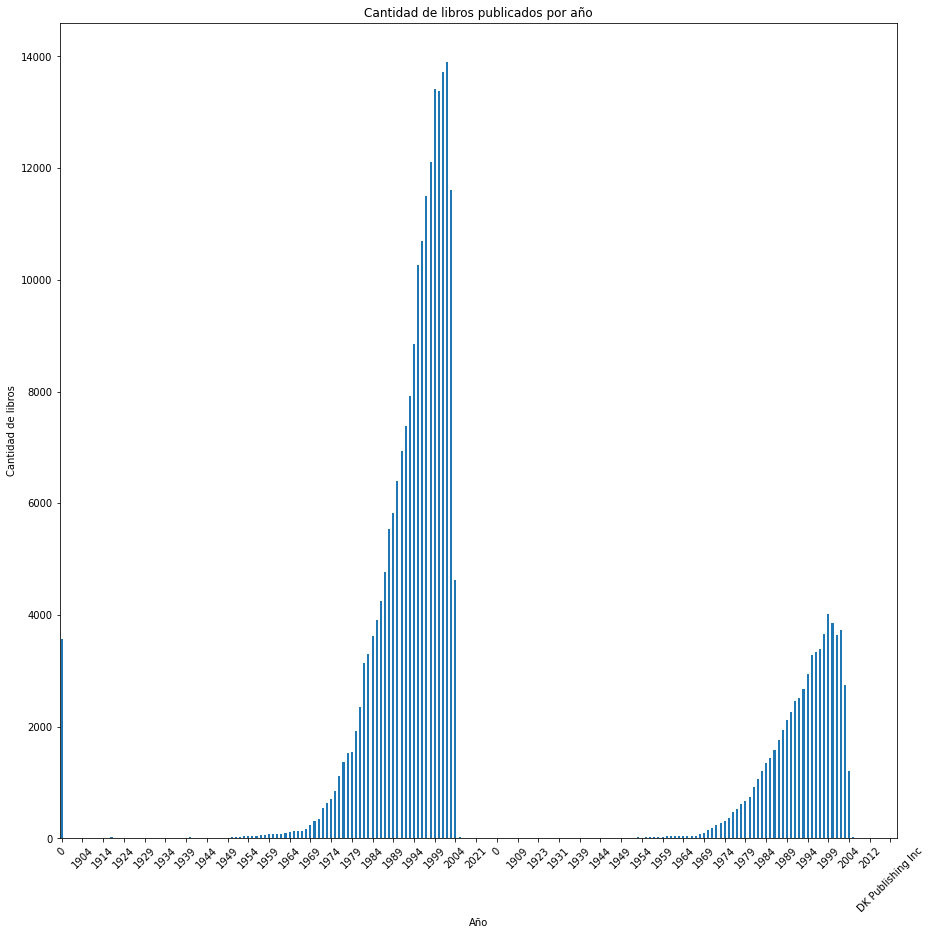

Año con más libros publicados: 2002
Autor más prolífico: Agatha Christie
Cantidad de libros del autor más prolífico: 632


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
books_df = pd.read_csv("../data/BX-CSV-Dump/BX-Books-clean.csv", sep=",", error_bad_lines=False, encoding="latin-1")

# Calcular el año en que se publicaron más libros
most_common_year = books_df["Year-Of-Publication"].value_counts().index[0]

# Graficar la cantidad de libros publicados por año
f=plt.figure(figsize=(15,15))
books_per_year = books_df.groupby("Year-Of-Publication")["ISBN"].count()
books_per_year.plot(kind="bar")
plt.title("Cantidad de libros publicados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de libros")
plt.xticks(range(0, len(books_per_year), 5), rotation=45)
plt.show()

# Encontrar al autor más prolífico
most_prolific_author = books_df["Book-Author"].value_counts().index[0]
num_books_by_author = books_df["Book-Author"].value_counts()[most_prolific_author]

print("Año con más libros publicados:", most_common_year)
print("Autor más prolífico:", most_prolific_author)
print("Cantidad de libros del autor más prolífico:", num_books_by_author)


2.3	Busca los mejores libros del año 2000 según Goodreads (https://www.goodreads.com/) utilizando técnicas de web scrapping ¿Cuáles de los autores que aparecen en la lista están también en el dataset? ¿Cuál fue el género más popular?

In [48]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.goodreads.com/list/best_of_year/2000?id=78.Best_Books_of_2000'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
books = soup.find_all('tr', {'itemtype': 'http://schema.org/Book'})

for book in books:
    title = book.find('a', {'class': 'bookTitle'}).text.strip()
    author = book.find('a', {'class': 'authorName'}).text.strip()
    genres = book.find_all('a', {'class': 'actionLinkLite bookPageGenreLink'})
    genres = [genre.text for genre in genres]
    print(title, author, genres)

Harry Potter and the Goblet of Fire (Harry Potter, #4) J.K. Rowling []
Angels & Demons (Robert Langdon, #1) Dan Brown []
A Storm of Swords (A Song of Ice and Fire, #3) George R.R. Martin []
The Amber Spyglass (His Dark Materials, #3) Philip Pullman []
The Amazing Adventures of Kavalier & Clay Michael Chabon []
Me Talk Pretty One Day David Sedaris []
On Writing: A Memoir of the Craft Stephen King []
Persepolis: The Story of a Childhood (Persepolis, #1) Marjane Satrapi []
Kitchen Confidential: Adventures in the Culinary Underbelly Anthony Bourdain []
Because of Winn-Dixie Kate DiCamillo []
Fantastic Beasts and Where to Find Them Newt Scamander []
House of Leaves Mark Z. Danielewski []
A Heartbreaking Work of Staggering Genius Dave Eggers []
The Princess Diaries (The Princess Diaries, #1) Meg Cabot []
The Wide Window (A Series of Unfortunate Events, #3) Lemony Snicket []
Storm Front (The Dresden Files, #1) Jim Butcher []
The Blind Assassin Margaret Atwood []
Fool Moon (The Dresden Files, 

In [47]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.goodreads.com/list/best_of_year/2000?id=78.Best_Books_of_2000'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
books = soup.find_all('tr', {'itemtype': 'http://schema.org/Book'})

hrefs = []
for book in books:
    img_link = book.find('img', {'class': 'bookCover'})
    hrefs += [img_link.parent['href']] if img_link else []

print(hrefs)



['/book/show/6.Harry_Potter_and_the_Goblet_of_Fire', '/book/show/960.Angels_Demons', '/book/show/62291.A_Storm_of_Swords', '/book/show/18122.The_Amber_Spyglass', '/book/show/3985.The_Amazing_Adventures_of_Kavalier_Clay', '/book/show/4137.Me_Talk_Pretty_One_Day', '/book/show/10569.On_Writing', '/book/show/9516.Persepolis', '/book/show/33313.Kitchen_Confidential', '/book/show/357664.Because_of_Winn_Dixie', '/book/show/41899.Fantastic_Beasts_and_Where_to_Find_Them', '/book/show/24800.House_of_Leaves', '/book/show/4953.A_Heartbreaking_Work_of_Staggering_Genius', '/book/show/38980.The_Princess_Diaries', '/book/show/438492.The_Wide_Window', '/book/show/47212.Storm_Front', '/book/show/78433.The_Blind_Assassin', '/book/show/91477.Fool_Moon', '/book/show/22232.Stargirl', '/book/show/14249.Prodigal_Summer', '/book/show/325365.The_Truth', '/book/show/3711.White_Teeth', '/book/show/65119.The_Miserable_Mill', '/book/show/153785.Page', '/book/show/10507.Baudolino', '/book/show/55401.Deadhouse_Gates'

In [50]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

url = 'https://www.goodreads.com/list/best_of_year/2000?id=78.Best_Books_of_2000'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
books = soup.find_all('tr', {'itemtype': 'http://schema.org/Book'})
while True:
genre_names = []
for book in books:
    url = 'https://www.goodreads.com' + book.find('a', {'class': 'bookTitle'})['href']
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    genres = soup.find_all('a', {'class': 'actionLinkLite bookPageGenreLink'})
    genre_names += [genre.text for genre in genres]
    
driver.quit()
genre_counts = Counter(genre_names)
print(genre_counts.most_common())


[]


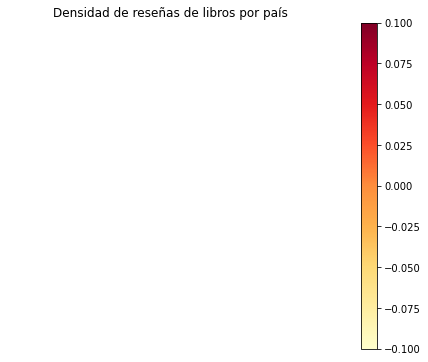

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch

# Leer el archivo BX-Users.csv
users = pd.read_csv('../data/BX-CSV-Dump/BX-Users-Cleaned.csv', sep=';', encoding='latin-1')

# Contar el número de usuarios por país
users_by_country = users.groupby('Location')['User-ID'].count().reset_index(name='User count')

# Cargar el archivo de shapefile del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unir los datos de usuarios con los datos del shapefile
users_geo = world.merge(users_by_country, left_on='name', right_on='Location', how='left')

# Crear un plot geográfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Densidad de reseñas de libros por país')

# Mostrar el mapa de calor de la densidad de usuarios
users_geo.plot(column='User count', cmap='YlOrRd', legend=True, ax=ax)

# Ocultar los ejes x e y
ax.axis('off')

# Mostrar el plot
plt.show()


In [46]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas.tools import geocode

# Cargar archivo BX-Users.csv en un dataframe
users_df = pd.read_csv("../data/BX-CSV-Dump/BX-Users-Cleaned.csv", sep=";", error_bad_lines=False, encoding="latin-1")

# Seleccionar solo las columnas "User-ID" y "Location"
locations_df = users_df[["User-ID", "Location"]]




/var/folders/hm/wv1q2r0d25n9tzws8ym7gfq80000gn/T/ipykernel_32588/1339154852.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users_df = pd.read_csv("../data/BX-CSV-Dump/BX-Users-Cleaned.csv", sep=";", error_bad_lines=False, encoding="latin-1")


In [50]:
# Geocodificar las ubicaciones utilizando la API de Nominatim de OpenStreetMap
locations = geocode(locations_df["Location"], provider="nominatim", user_agent="book-reviews", timeout=10)

# Agregar las coordenadas geográficas al dataframe original
locations_df["Latitude"] = locations.geometry.y
locations_df["Longitude"] = locations.geometry.x


KeyboardInterrupt: 

In [38]:
pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 KB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 852.9 kB/s eta 0:00:00 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [42]:
# Agrupar por país y contar el número de reseñas por país
country_counts = locations_df.groupby(["Latitude", "Longitude"]).size().reset_index(name="Count")

# Crear un GeoDataFrame a partir del dataframe de conteos y la geometría del mundo
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
geo_df = gpd.GeoDataFrame(country_counts, geometry=gpd.points_from_xy(country_counts.Longitude, country_counts.Latitude))

# Agregar los conteos al GeoDataFrame y convertirlos en una escala de colores
geo_df["Count"] = np.log(geo_df["Count"])
geo_df.plot(column="Count", cmap="Reds", legend=True, legend_kwds={"label": "Log(count)", "orientation": "horizontal"}, markersize=5)
world.boundary.plot(ax=plt.gca(), color="black")
plt.title("Mapa de calor de reseñas por país")
plt.show()


KeyError: 'Latitude'